In [27]:
#!pip install tensorflow
#!pip install pythainlp
!pip install torch

     |████████████████████████████████| 108.1 MB 877 kB/s eta 0:00:01    |███████████████▋                | 52.9 MB 656 kB/s eta 0:01:25     |████████████████                | 53.8 MB 743 kB/s eta 0:01:13     |█████████████████▊              | 59.8 MB 874 kB/s eta 0:00:56     |█████████████████████████████   | 98.1 MB 388 kB/s eta 0:00:26     |█████████████████████████████▋  | 100.2 MB 808 kB/s eta 0:00:10


In [ ]:
import tensorflow as tf
import pandas as pd 

import numpy as np

from pythainlp import word_tokenize
from tqdm import tqdm_notebook
from pythainlp.ulmfit import process_thai

#viz
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_excel('Downloads/bank_text.xlsx')

In [17]:
df.head()

,CreatedDate,CreatedTime,Topic,Description,UserName,Where,Channel,Link,Gender,EngagementPerMessage,...,Dislikes,Favorites,Comments,Reactions,Shares,Views,Keyword,Sentiments,Tag,Location
0,2018-07-31,23:23:05,Tweeted,เพื่อนโอนเงินจากธ.อื่นมาให้เมื่อบ่าย ปัจจุบันเ...,Tatar_Wong,Tatar_Wong,twitter,http://twitter.com/Tatar_Wong/status/102432961...,Unknown,1.0,...,0,0,0,0,0,0,BBL,Negative,Mobile Banking,NaN
1,2018-07-31,22:46:51,Tweeted,ตอนนี้มีใครโอนเงินเข้าธนาคารออมสินแล้วเงินยังเ...,DefsoulJBJY,DefsoulJBJY,twitter,http://twitter.com/DefsoulJBJY/status/10243204...,Unknown,1.0,...,0,0,0,0,0,0,GSB,Neutral,Mobile Banking,NaN
2,2018-07-31,22:24:11,Tweeted,โทรสามรอบกว่าจะติด โทรติดพนงไม่มีคนว่างอีก รอไ...,papaipapai,papaipapai,twitter,http://twitter.com/papaipapai/status/102431479...,Unknown,1.0,...,0,0,0,0,0,0,BAY,Neutral,Internet Banking,NaN
3,2018-07-31,22:12:26,Tweeted,แอพบัวหลวงควรพัฒนาปรับปรุงมั้งนะ =_____=,nuueyezz13,nuueyezz13,twitter,http://twitter.com/nuueyezz13/status/102431183...,Unknown,0.0,...,0,0,0,0,0,0,BBL,Neutral,Mobile Banking,NaN
4,2018-07-31,22:12:26,Tweeted,แอพบัวหลวงควรพัฒนาปรับปรุงมั้งนะ =_____=,nuueyezz13,nuueyezz13,twitter,http://twitter.com/nuueyezz13/status/102431183...,Unknown,0.0,...,0,0,0,0,0,0,BBL,Neutral,User Interface,NaN


In [77]:
df2= df[['Description','Sentiments']]

In [73]:
df2.head()

,Description,Sentiments
0,เพื่อนโอนเงินจากธ.อื่นมาให้เมื่อบ่าย ปัจจุบันเ...,Negative
1,ตอนนี้มีใครโอนเงินเข้าธนาคารออมสินแล้วเงินยังเ...,Neutral
2,โทรสามรอบกว่าจะติด โทรติดพนงไม่มีคนว่างอีก รอไ...,Neutral
3,แอพบัวหลวงควรพัฒนาปรับปรุงมั้งนะ =_____=,Neutral
4,แอพบัวหลวงควรพัฒนาปรับปรุงมั้งนะ =_____=,Neutral


In [102]:
df2['Sentiments'].value_counts(normalize=False)

Neutral     332
Negative    325
Positive     45
Name: Sentiments, dtype: int64

In [78]:
df2.drop_duplicates(subset=['Description'],inplace=True)

<ipython-input-78-b26b3e1bbf97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(subset=['Description'],inplace=True)


In [101]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(features, df["target"], stratify = df["target"], test_size = 0.2)
np.random.seed(1000)
remove_n = 100
drop_indices = np.random.choice(df.index, remove_n, replace=False)
df2 = df2.drop(df2[df2['Sentiments']== "Neutral"].sample(frac=.75).index)

In [103]:
x =df2.Description[:2]
for i in x:
    print("1", word_tokenize(i))

1 ['เพื่อน', 'โอน', 'เงิน', 'จาก', 'ธ.', 'อื่น', 'มา', 'ให้', 'เมื่อ', 'บ่าย', ' ', 'ปัจจุบัน', 'เงิน', 'ยัง', 'ไม่', 'เข้า', 'เลย', 'จ้า', ' ', 'เงิน', 'กุ', 'ไป', 'ไหน', '?', ' ', '#', 'ธนาคาร', 'กรุงเทพ']
1 ['จน', 'ตอนนี้', 'ก็', 'ยัง', 'เข้า', 'แอพ', 'บัวหลวง', 'ไม่', 'ได้', ' ', 'จะ', 'แฮ', 'ง', 'ไป', 'จนถึง', 'เมื่อไหร่', ' ', 'ชาติหน้า', 'เลย', 'ไหม', 'มม']


In [36]:
x = df2.Description[:2]

In [104]:
def get_tokenize(x):
    return word_tokenize(x)

In [105]:
tokenized_text=[]
for i in df2.Description:
    tokenized_text.append(word_tokenize(i))
    

In [106]:
tokenized_text[0]

['เพื่อน',
 'โอน',
 'เงิน',
 'จาก',
 'ธ.',
 'อื่น',
 'มา',
 'ให้',
 'เมื่อ',
 'บ่าย',
 ' ',
 'ปัจจุบัน',
 'เงิน',
 'ยัง',
 'ไม่',
 'เข้า',
 'เลย',
 'จ้า',
 ' ',
 'เงิน',
 'กุ',
 'ไป',
 'ไหน',
 '?',
 ' ',
 '#',
 'ธนาคาร',
 'กรุงเทพ']

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [108]:
vectorizer = TfidfVectorizer()
all_tokenized = [" ". join(x) for x in tokenized_text]
X = vectorizer.fit_transform(all_tokenized)

In [109]:
X

<702x2068 sparse matrix of type '<class 'numpy.float64'>'
	with 16986 stored elements in Compressed Sparse Row format>

In [110]:
#print(vectorizer.get_feature_names())
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df2["Sentiments"], stratify = df2["Sentiments"], test_size = 0.2)



In [111]:
from sklearn.naive_bayes import MultinomialNB

In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score

from sklearn.naive_bayes import MultinomialNB
multinomialNb = MultinomialNB()
multinomialNb.fit(X_train, y_train)

y_pred_train = multinomialNb.predict(X_train)
y_pred_test = multinomialNb.predict(X_test)



In [117]:
from sklearn.metrics import accuracy_score

In [119]:
accuracy_score(y_pred,y_test)

0.6595744680851063

In [121]:
from sklearn.metrics import classification_report

In [124]:
classification_report(y_test,y_pred_test)

/Users/theethat/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n    Negative       0.63      0.78      0.70        65\n     Neutral       0.70      0.63      0.66        67\n    Positive       0.00      0.00      0.00         9\n\n    accuracy                           0.66       141\n   macro avg       0.44      0.47      0.45       141\nweighted avg       0.62      0.66      0.64       141\n'

In [125]:
classification_report(y_train,y_pred_train)

'              precision    recall  f1-score   support\n\n    Negative       0.79      0.95      0.87       260\n     Neutral       0.86      0.81      0.83       265\n    Positive       0.00      0.00      0.00        36\n\n    accuracy                           0.82       561\n   macro avg       0.55      0.59      0.57       561\nweighted avg       0.77      0.82      0.80       561\n'

In [130]:
!pip install tensorflow_datasets
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf

tfds.disable_progress_bar()

In [131]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [132]:
dataset, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

train_dataset.element_spec

Shuffling and writing examples to /Users/theethat/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete6QD8HT/imdb_reviews-train.tfrecord
Shuffling and writing examples to /Users/theethat/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete6QD8HT/imdb_reviews-test.tfrecord
Shuffling and writing examples to /Users/theethat/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete6QD8HT/imdb_reviews-unsupervised.tfrecord
Dataset imdb_reviews downloaded and prepared to /Users/theethat/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [133]:
for example, label in train_dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

text:  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
label:  0


In [134]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [135]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

In [136]:
VOCAB_SIZE=1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [137]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but'],
      dtype='<U14')

In [138]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but'],
      dtype='<U14')

In [139]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [140]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


In [141]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

[0.00338266]


In [142]:
padding = "the " * 2000
predictions = model.predict(np.array([sample_text, padding]))
print(predictions[0])

[0.00338266]


In [143]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [144]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 406s 1s/step - loss: 0.6433 - accuracy: 0.5574 - val_loss: 0.4986 - val_accuracy: 0.7443
Epoch 2/10
391/391 [==============================] - 434s 1s/step - loss: 0.4580 - accuracy: 0.7808 - val_loss: 0.4222 - val_accuracy: 0.7943
Epoch 3/10
391/391 [==============================] - 455s 1s/step - loss: 0.3814 - accuracy: 0.8349 - val_loss: 0.3702 - val_accuracy: 0.8422
Epoch 4/10
391/391 [==============================] - 468s 1s/step - loss: 0.3460 - accuracy: 0.8531 - val_loss: 0.3500 - val_accuracy: 0.8484
Epoch 5/10
391/391 [==============================] - 466s 1s/step - loss: 0.3287 - accuracy: 0.8612 - val_loss: 0.3331 - val_accuracy: 0.8562
Epoch 6/10
391/391 [==============================] - 429s 1s/step - loss: 0.3160 - accuracy: 0.8672 - val_loss: 0.3298 - val_accuracy: 0.8531
Epoch 7/10
391/391 [==============================] - 456s 1s/step - loss: 0.3079 - accuracy: 0.8704 - val_loss: 0.3276 - val_accuracy: 0.8620

In [145]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 98s 251ms/step - loss: 0.3151 - accuracy: 0.8632
Test Loss: 0.3150942921638489
Test Accuracy: 0.8631600141525269


(0.0, 0.6604848369956017)

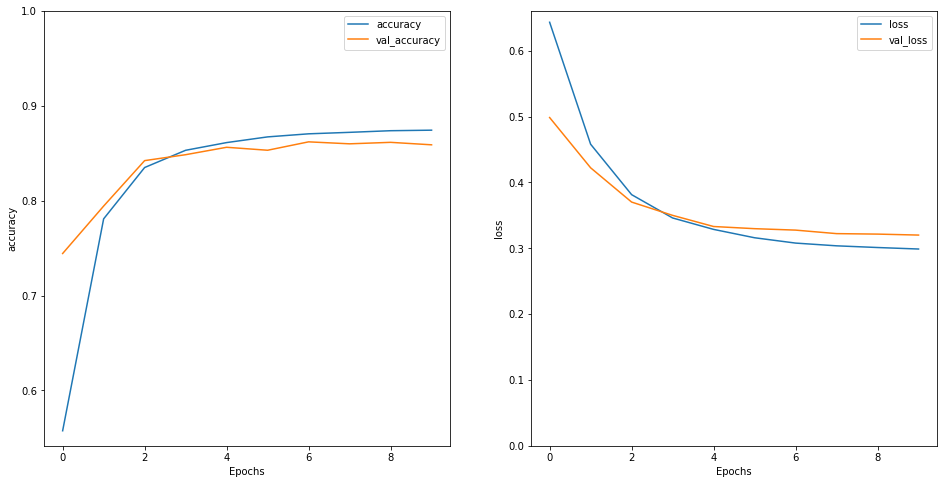

In [146]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.ylim(None,1)
plt.subplot(1,2,2)
plot_graphs(history, 'loss')
plt.ylim(0,None)

In [148]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions)

[[0.80487275]]


In [149]:
# predict on a sample text without padding.

sample_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions)

[[-1.6435711]]


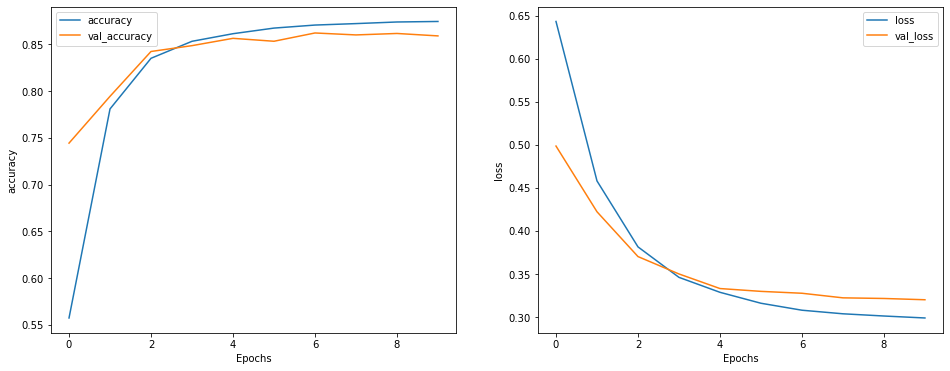

In [150]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.subplot(1,2,2)
plot_graphs(history, 'loss')